# IV Regresja Liniowa

Zaprojektowanie modelu regresji liniowej, który posłuży predykcji temperatur na podstawie wyselekcjonowanych danych.

In [1]:
# data manipulation tools
import pandas as pd
import numpy as np

# Random Forest model
from sklearn.ensemble import RandomForestRegressor

# Linear Regression model
from sklearn.linear_model import LinearRegression

# Epsilon-Support Vector Regression
from sklearn import svm 

# model selection
from sklearn.model_selection import cross_val_score # perform cross-validation for estimator evaluation
from sklearn.model_selection import cross_val_predict # generate cross-validated estimates for each input
from sklearn.model_selection import train_test_split # splits arrays/matrices into random train and test subsets
from sklearn.model_selection import GridSearchCV # determines estimator paremeters values
from sklearn.model_selection import StratifiedKFold # stratified k-fold cross-validator
from sklearn.model_selection import KFold # k-fold cross-validator

# model evaluation
from sklearn.metrics import mean_absolute_error, median_absolute_error

# feature selection based on weights importance
from sklearn.feature_selection import SelectFromModel

# data preprocessing
from sklearn.preprocessing import MinMaxScaler

# plots
import matplotlib.pyplot as plt
import seaborn as sns

# rest
import random


Wczytanie danych.

In [2]:
%store -r predictors_x
%store -r outcomes_y

In [3]:
predictors_x.head()

,landAvg_1_PriorYear,landAvg_2_PriorYear,landAvg_3_PriorYear,landAvg_4_PriorYear,landMax_2_PriorYear,landMax_5_PriorYear,landMin_4_PriorYear,land&OceanAvg_1_PriorYear,land&OceanAvg_2_PriorYear,oceanAvg_1_PriorYear,oceanAvg_2_PriorYear,oceanAvg_5_PriorYear
date,,,,,,,,,,,,
1850-01-01,-1.344498,-1.343748,-1.342076,-1.341202,-1.404913,-1.403688,-1.277205,-1.177569,-1.176354,1.528022,1.528980,1.529537
1851-01-01,-1.344498,-1.343748,-1.342076,-1.341202,-1.404913,-1.403688,-1.277205,-1.177569,-1.176354,1.528022,1.528980,1.529537
1852-01-01,-1.439527,-1.343748,-1.342076,-1.341202,-1.404913,-1.403688,-1.277205,-1.543883,-1.176354,1.233484,1.528980,1.529537
1853-01-01,-1.452432,-1.438803,-1.342076,-1.341202,-1.250940,-1.403688,-1.277205,-1.554889,-1.543128,1.248574,1.234485,1.529537
1854-01-01,-1.590870,-1.451711,-1.437103,-1.341202,-1.361717,-1.403688,-1.277205,-1.624064,-1.554147,1.479957,1.249573,1.529537


In [4]:
outcomes_y.head()

,landAvg
date,
1850-01-01,-1.834912
1851-01-01,-1.440372
1852-01-01,-1.453273
1853-01-01,-1.591667
1854-01-01,-1.710123


Wydzielenie zbiorów treningowego (x, y) oraz testowego (x_test, y_test):

In [5]:
x_train, x_test, y_train, y_test = train_test_split(predictors_x, outcomes_y, test_size=0.1, random_state=0)

In [6]:
x_train.shape, y_train.shape

((1792, 12), (1792, 1))

In [7]:
x_test.shape, y_test.shape

((200, 12), (200, 1))

x_train.head()

In [8]:
y_train.head()

,landAvg
date,
1891-08-01,1.155101
1854-09-01,0.690191
1870-04-01,-0.162456
1939-04-01,-0.057136
1917-03-01,-0.957870


### I Modele Regresji Liniowej

#### RandomForest

Zbudowanie oraz optymalizacja parametrów modelu.

In [9]:
# Perform Grid-Search to find hyperparameters for regression estimator
# max_depth refers to tree depth
# n_estimators refers to number of threes in forest
# cv parameter determines number of folds of providet dataset or cross-validator object
gsc_rfr = GridSearchCV(estimator=RandomForestRegressor(), 
                   param_grid={'max_depth': range(2, 10), 'n_estimators': (10, 50, 100, 1000), },
                   cv=KFold(n_splits=10, shuffle=True, random_state=None), scoring='neg_mean_squared_error', 
                   verbose=1, n_jobs=-1, refit=True, return_train_score=True)

# fitting GridSearchCV instance with data to determine best parameters
grid_result = gsc_rfr.fit(x_train.values, y_train.values.ravel())
best_params = grid_result.best_params_

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   27.3s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.3min finished


In [10]:
# GridSearchCV trainig raport 
pd.DataFrame(data=gsc_rfr.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.062912,0.017226,0.001017,0.002445,2,10,"{'max_depth': 2, 'n_estimators': 10}",-0.057336,-0.046008,-0.043732,...,-0.042232,-0.035033,-0.043121,-0.039728,-0.044878,-0.042448,-0.047042,-0.040472,-0.042582,0.003349
1,0.237177,0.026947,0.005882,0.004287,2,50,"{'max_depth': 2, 'n_estimators': 50}",-0.050826,-0.036896,-0.040195,...,-0.038491,-0.037213,-0.037377,-0.038151,-0.038876,-0.038689,-0.041961,-0.037877,-0.038741,0.001372
2,0.474879,0.070430,0.010355,0.000618,2,100,"{'max_depth': 2, 'n_estimators': 100}",-0.052682,-0.038006,-0.040778,...,-0.038751,-0.033891,-0.035909,-0.037585,-0.037755,-0.038037,-0.043809,-0.037277,-0.038201,0.002498
3,4.916981,0.703325,0.107233,0.025317,2,1000,"{'max_depth': 2, 'n_estimators': 1000}",-0.051241,-0.038659,-0.040495,...,-0.038612,-0.036424,-0.037922,-0.037766,-0.038046,-0.037174,-0.042240,-0.037039,-0.038455,0.001614
4,0.067828,0.015819,0.002232,0.003558,3,10,"{'max_depth': 3, 'n_estimators': 10}",-0.023530,-0.013119,-0.018516,...,-0.016039,-0.015395,-0.015394,-0.015614,-0.014898,-0.015637,-0.016276,-0.014522,-0.015379,0.000525


In [11]:
# best parameters privided by GridSearchCV
best_params

{'max_depth': 7, 'n_estimators': 1000}

In [12]:
# Random Forest Regressor estimator
rfr_estimator = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"], 
                            random_state=False, verbose=0)

In [13]:
# fitting randomforest model
rfr_estimator.fit(x_train.values, y_train.values.ravel())

RandomForestRegressor(max_depth=7, n_estimators=1000, random_state=False)

**EWALUACJA**  
Evaluacja modelu na wcześniej wydzielonych danych testowych:

Model Predictions:

In [14]:
outcomes = pd.DataFrame.copy(y_test)
outcomes["rfr_predictions"] = rfr_estimator.predict(x_test.values)
outcomes.head()

,landAvg,rfr_predictions
date,,
1994-11-01,-0.418368,-0.606532
1999-08-01,1.354951,1.424944
1980-06-01,1.175273,1.124208
1957-01-01,-1.427002,-1.356155
1913-10-01,0.118554,0.122459


In [15]:
print("The Explained Variance: %.2f" % rfr_estimator.score(x_test.values, y_test.values.ravel()))
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, outcomes['rfr_predictions']))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, outcomes['rfr_predictions']))

The Explained Variance: 0.99
The Mean Absolute Error: 0.08 degrees celsius
The Median Absolute Error: 0.06 degrees celsius


Wykres obrazujący uzyskane wyniki.

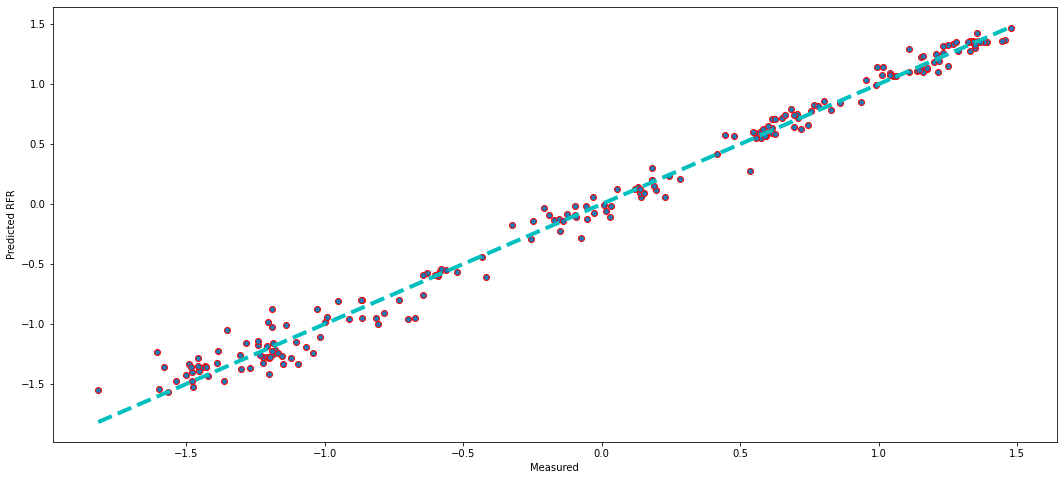

In [16]:
fig, ax = plt.subplots(figsize=(18,8))
ax.scatter(y_test, outcomes['rfr_predictions'], edgecolors='r')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='c')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted RFR')
plt.show()

#### SVM

Zbudowanie oraz optymalizacja parametrów modelu.

In [17]:
# Perform Grid-Search to find hyperparameters for SVM regression estimator
gsc_svm = GridSearchCV(estimator=svm.SVR(), 
                   param_grid={'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],
                               'kernel': ['rbf', 'poly', 'sigmoid'], 'epsilon': [0.1,0.15,0.2,0.25,0.3],
                              'max_iter': [100, 1000, 10000, 100000, 1000000]},
                       cv=KFold(n_splits=10, shuffle=True, random_state=None), scoring='neg_mean_squared_error', 
                       verbose=1, n_jobs=-1, refit=True, return_train_score=True)

In [18]:
# fitting GridSearchCV instance for SVM with selected data
grid_result = gsc_svm.fit(x_train.values, y_train.values.ravel())

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 244 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 733 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 1590 tasks      | elapsed:   46.7s
[Parallel(n_jobs=-1)]: Done 2585 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3654 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 5016 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 6470 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 7788 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 9500 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 10924 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed: 11.3min finished


In [19]:
# GridSearchCV trainig raport 
pd.DataFrame(data=gsc_rfr.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.062912,0.017226,0.001017,0.002445,2,10,"{'max_depth': 2, 'n_estimators': 10}",-0.057336,-0.046008,-0.043732,...,-0.042232,-0.035033,-0.043121,-0.039728,-0.044878,-0.042448,-0.047042,-0.040472,-0.042582,0.003349
1,0.237177,0.026947,0.005882,0.004287,2,50,"{'max_depth': 2, 'n_estimators': 50}",-0.050826,-0.036896,-0.040195,...,-0.038491,-0.037213,-0.037377,-0.038151,-0.038876,-0.038689,-0.041961,-0.037877,-0.038741,0.001372
2,0.474879,0.070430,0.010355,0.000618,2,100,"{'max_depth': 2, 'n_estimators': 100}",-0.052682,-0.038006,-0.040778,...,-0.038751,-0.033891,-0.035909,-0.037585,-0.037755,-0.038037,-0.043809,-0.037277,-0.038201,0.002498
3,4.916981,0.703325,0.107233,0.025317,2,1000,"{'max_depth': 2, 'n_estimators': 1000}",-0.051241,-0.038659,-0.040495,...,-0.038612,-0.036424,-0.037922,-0.037766,-0.038046,-0.037174,-0.042240,-0.037039,-0.038455,0.001614
4,0.067828,0.015819,0.002232,0.003558,3,10,"{'max_depth': 3, 'n_estimators': 10}",-0.023530,-0.013119,-0.018516,...,-0.016039,-0.015395,-0.015394,-0.015614,-0.014898,-0.015637,-0.016276,-0.014522,-0.015379,0.000525


In [20]:
best_params_svm = grid_result.best_params_
best_params_svm

{'C': 100, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 100000}

In [21]:
svm_estimator = gsc_svm.best_estimator_

**EWALUACJA**

In [23]:
outcomes['svm_predictions'] = svm_estimator.predict(x_test.values)

In [24]:
print("The Explained Variance: %.2f" % svm_estimator.score(x_test.values, y_test.values.ravel()))
print("The Mean Absolute Error: %.2f degrees celsius" % mean_absolute_error(y_test, outcomes['svm_predictions']))
print("The Median Absolute Error: %.2f degrees celsius" % median_absolute_error(y_test, outcomes['svm_predictions']))

The Explained Variance: 0.99
The Mean Absolute Error: 0.07 degrees celsius
The Median Absolute Error: 0.05 degrees celsius


### II Graficzne przedstawienie uzyskanych wyników

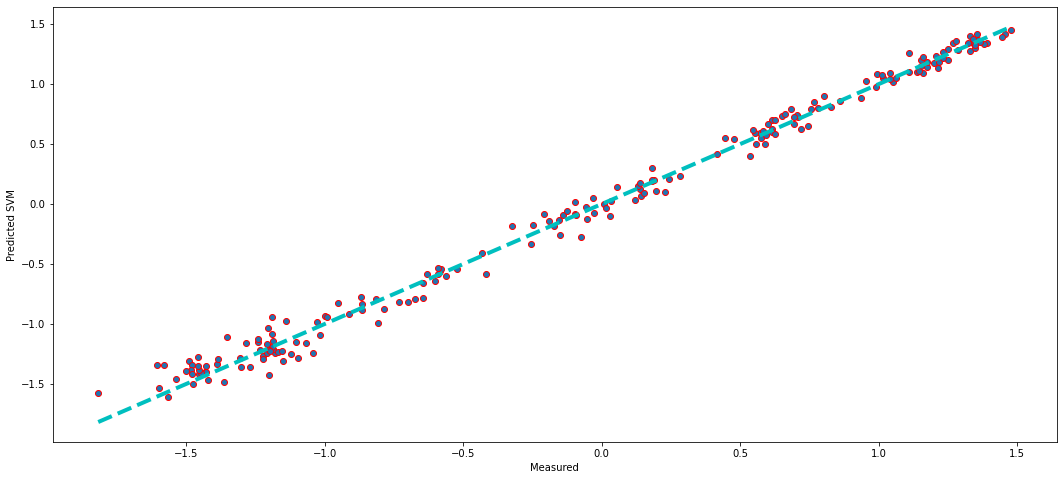

In [25]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.scatter(y_test, outcomes['svm_predictions'], edgecolors='r')
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4, color='c')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted SVM')
plt.show()

Przedstawienie zależności pomiędzy wynikami rzeczywistymi a uzyskanymi z wykorzystaniem regresji liniowej dla modeli RandomForest oraz SVM.

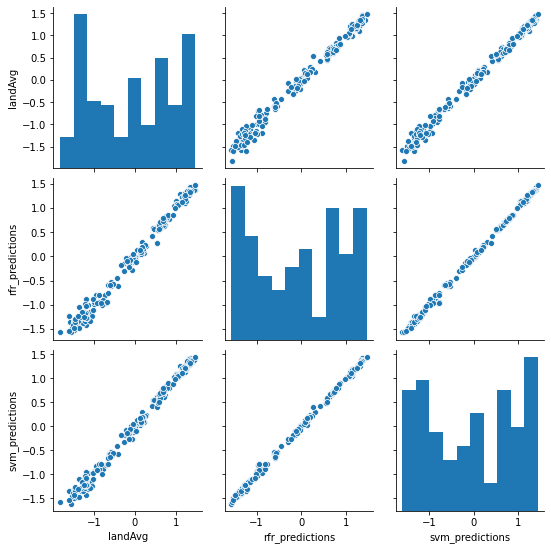

In [26]:
sns.pairplot(outcomes, palette='Dark2')

### Podsumowanie

W celu realizaji tematu predykcji średnich temperatur lądów na Ziemi, zbudowane oraz porównane zostały dwa modele regresji liniowej (RandomForest oraz SVM). Wyniki w obydwu przypadkach okazały się więcej niż zadowalające średni błąd absolutny (MAE) wyniósł odpowiednio 0,08 (RFF) oraz 0,07 (SVM) dla wyznaczonych zbiorów testowych. Cały proces przebiegł następująco:
* Wyznaczenie optymalnych parametrów dla modeli regresji.
* Zbudowanie modeli RandomForest oraz SVM
* Ewaluacja modeli
* Zestawienie graficzne otrzymanych wyników